In [16]:
pip install pandas matplotlib pillow opencv-python scikit-learn

     ---------------------------------------- 7.6/7.6 MB 37.4 MB/s eta 0:00:00
     --------------------------------------- 40.2/40.2 MB 43.7 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\hyunw\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import Image as Jupyter_Image

In [5]:
import cv2
import os
import random

In [6]:
IMAGE_SIZE = 200

In [7]:
CATEGORIES = ['1', '2', '3', '4', '5']

In [8]:
training_data = []
for category in CATEGORIES:
    category_path = os.path.join('.', 'train', category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(category_path):
        if '.png' in img:
            o_image = cv2.imread(os.path.join(category_path, img))
            new_image = cv2.resize(o_image, (IMAGE_SIZE, IMAGE_SIZE))
            training_data.append([os.path.join(category_path, img), new_image, class_num])

In [9]:
testing_data = []
for category in CATEGORIES:
    category_path = os.path.join('.', 'test', category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(category_path):
        if '.png' in img:
            o_image = cv2.imread(os.path.join(category_path, img))
            new_image = cv2.resize(o_image, (IMAGE_SIZE, IMAGE_SIZE))
            testing_data.append([os.path.join(category_path, img), new_image, class_num])

In [10]:
train_data=[]
train_label=[]

for o_image, categories, label in training_data:
    train_data.append(categories)
    train_label.append(label)

train_data=np.array(train_data).reshape(len(training_data), -1)
train_label=np.array(train_label)

In [11]:
test_data=[]
test_label=[]

for o_image, categories, label in testing_data:
    test_data.append(categories)
    test_label.append(label)

test_data=np.array(test_data).reshape(len(test_data), -1)
test_label=np.array(test_label)

1


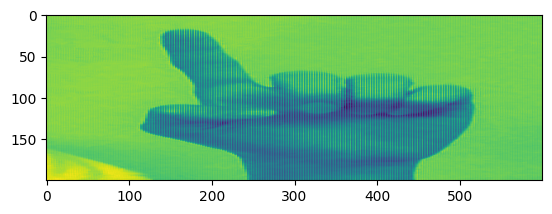

In [12]:
plt.imshow(np.array(train_data[5]).reshape(200, -1))
print(CATEGORIES[train_label[5]])

In [17]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_data, train_label)

SVC(kernel='linear')

In [18]:
predict_result = svc.predict(test_data)

In [19]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(test_label,predict_result))

Accuracy on unknown data is 0.9


In [20]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(test_label,predict_result))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      0.50      0.67         2

    accuracy                           0.90        10
   macro avg       0.93      0.90      0.89        10
weighted avg       0.93      0.90      0.89        10



In [21]:
result = pd.DataFrame({'label' : test_label, 'predicted' : predict_result})

In [22]:
result

,label,predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,2,2
5,2,2
6,3,3
7,3,3
8,4,3
9,4,4
